# Klasifikasi Heart Disease

## Background

Penyakit jantung, sering disebut sebagai pembunuh nomor satu di seluruh dunia, telah menjadi epidemi global yang mendalam. Pentingnya deteksi penyakit jantung menjadi semakin nyata seiring dengan meningkatnya angka kematian dan dampak negatif yang ditimbulkannya pada kualitas hidup individu. Ini adalah masalah kesehatan yang memengaruhi jutaan orang di seluruh dunia, tidak mengenal usia, jenis kelamin, atau latar belakang.


## Goals

Tujuan dari proyek ini adalah untuk membangun model Machine Learning yang dapat memprediksi risiko penyakit jantung berdasarkan atribut medis pasien seperti usia, jenis kelamin, tekanan darah, kadar kolesterol, dan lainnya. Prediksi ini akan membantu dokter dan peneliti untuk mengidentifikasi faktor risiko yang signifikan dan mengambil langkah-langkah pencegahan yang sesuai.


By Rofik

Dataset: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

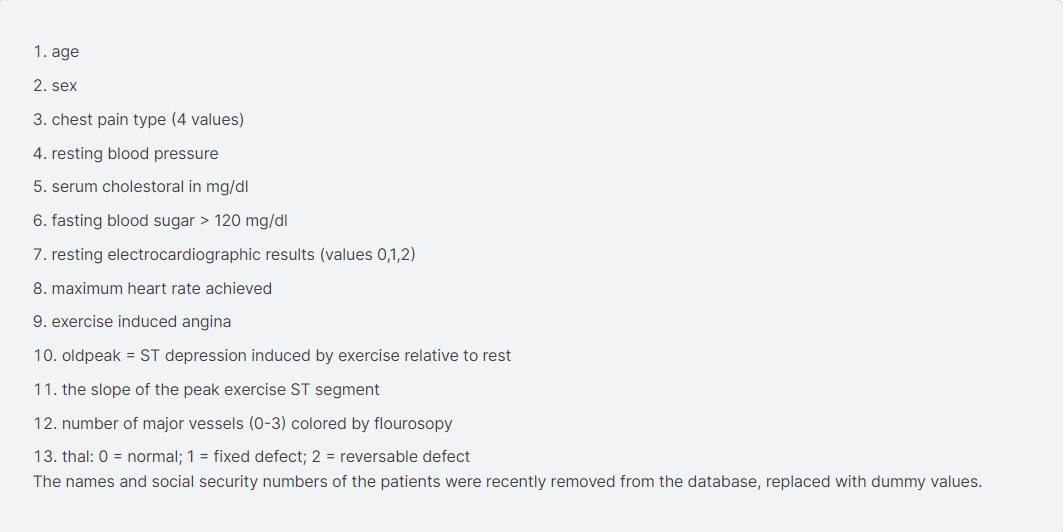

In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
#import package
import pandas as pd
import numpy as np

# Import Dataset

In [122]:
# Baca data
df = pd.read_csv('/content/drive/MyDrive/DATASET/heart.csv')

In [123]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [124]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [125]:
# cek jumlah row dan column
df.shape

(1025, 14)

In [126]:
# Melihat columns apa saja yang ada dalam  dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [127]:
# cek jumlah row dan column
df.shape

(1025, 14)

In [128]:
# Check informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Data Preprocessing

## Mengecek Duplikasi Data

In [129]:
# Mengecek data duplikat
duplicates = df[df.duplicated(keep='first')]
duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [130]:
# Mengurutkan data duplikat berdasarkan kolom tertentu
sorted_duplicates = duplicates.sort_values(by=['age'], ascending=False)
sorted_duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
387,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
162,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
965,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
535,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
724,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


Terdapat beberapa data yang memiliki baris-baris yang sama persis. Duplikasi data ini hanya akan menciptakan redundansi dan mempengaruhi analisis data. Langkah selanjutnya adalah menghapusnya, atau menyimpan data yang tidak duplikat.

In [131]:
df1 = df.drop_duplicates(keep='first')

In [132]:
# cek jumlah row dan column
df1.shape

(302, 14)

In [133]:
#statistik deskriptif
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Mengecek Keseimbangan kelas

In [134]:
class_counts = df1['target'].value_counts()
print('Jumlah Penderita Heart Disease:', class_counts[1])
print('Jumlah Orang Sehat:', class_counts[0])

Jumlah Penderita Heart Disease: 164
Jumlah Orang Sehat: 138


Jumlah penderita Hear Disease lebih besar dibanding orang yang dalam kondisi sehat. Untuk membuat model menghasilkan perfroma baik, yang mana seimbang dalam belajar dari 2 kelas tersebut, perlu dilakukan penyeimbangan kelas.

## Penyeimbangan kelas dengan SMOTE

Cara kerja SMOTE untuk menyeimbangkan data
1. SMOTE memilih satu sampel dari kelas minoritas yang akan di-'over-sample'.

2. Kemudian, SMOTE memilih beberapa tetangga terdekat dari sampel tersebut.

3. Untuk setiap tetangga yang dipilih, SMOTE menghitung perbedaan antara fitur-fitur sampel awal dan tetangga tersebut.

4. SMOTE kemudian menghasilkan sampel sintetis dengan cara mengambil rasio perbedaan ini dan menggabungkannya dengan sampel awal. Ini menghasilkan sampel baru yang seimbang antara sampel awal dan tetangga.

5. Proses ini diulang untuk beberapa sampel dari kelas minoritas hingga jumlahnya seimbang dengan kelas mayoritas.

In [135]:
from imblearn.over_sampling import SMOTE

# Memisahkan fitur dan target
X = df1.drop('target', axis=1)
y = df1['target']

# Menerapkan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menggabungkan fitur dan target kembali
df2 = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame({'target': y_resampled})], axis=1)

In [136]:
# Melihat distribusi kelas setelah SMOTE
class_counts = df2['target'].value_counts()
print('Jumlah Penderita Heart Disease:', class_counts[1])
print('Jumlah Orang Sehat:', class_counts[0])

Jumlah Penderita Heart Disease: 164
Jumlah Orang Sehat: 164


Setelah SMOTE,dapat dilihat bahwa data seimbang antar kelasnya. Yang masing masing ada 164 record data

# Model Development 1

In [137]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [138]:
# Bagi data menjadi fitur (X) dan label (y)
X = df2.drop('target', axis=1)
y = df2['target']

## Standarisasi Data

In [139]:
from sklearn.preprocessing import StandardScaler
# Normalisasi data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [140]:
X

array([[-0.28297907,  0.69581815, -0.89189994, ...,  1.03705803,
         1.30006663,  1.10849285],
       [-0.17020005,  0.69581815, -0.89189994, ..., -2.21801406,
        -0.73051363,  1.10849285],
       [ 1.74704332,  0.69581815, -0.89189994, ..., -2.21801406,
        -0.73051363,  1.10849285],
       ...,
       [ 0.6192531 ,  0.69581815, -0.89189994, ...,  1.03705803,
         0.2847765 ,  1.10849285],
       [ 0.50647408,  0.69581815,  0.09309393, ..., -0.59047802,
         0.2847765 , -2.15236504],
       [ 0.28091604,  0.69581815,  0.09309393, ..., -0.59047802,
        -0.73051363,  1.10849285]])

## Split Data

In [141]:
# Bagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

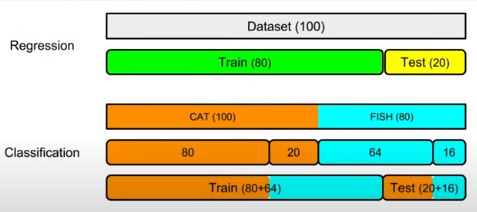

## Modelling

### Model XGBoost

In [142]:
xgb = XGBClassifier()

In [143]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [144]:
# Melakukan prediksi pada data pelatihan
y_predicted_train = xgb.predict(X_train)

In [145]:
accuracy_train = accuracy_score(y_train, y_predicted_train)
accuracy_train

1.0

In [146]:
y_predicted = xgb.predict(X_test)

In [147]:
y_predicted

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [148]:
accuracy_score(y_predicted, y_test)

0.7878787878787878

Model yang dibangun mengalami overfitting, dengan akurasi pelatihan yang sempurna namun akurasi pengujian yang sangat rendah.

### Model Random Forest

In [149]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Melakukan prediksi pada data pelatihan
y_predicted_train_rf = rf.predict(X_train)
accuracy_train_rf = accuracy_score(y_train, y_predicted_train_rf)
print("Accuracy on training data:", accuracy_train_rf)

# Melakukan prediksi pada data pengujian
y_predicted_rf = rf.predict(X_test)
accuracy_test_rf = accuracy_score(y_predicted_rf, y_test)
print("Accuracy on testing data:", accuracy_test_rf)

Accuracy on training data: 1.0
Accuracy on testing data: 0.7878787878787878


Akurasi masih bisa dikatakan overfitting dengan menggunakan Random Forest, namun lebih baik jika dibandingkan dengan model XGBoost

### Model KNN

In [150]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Melakukan prediksi pada data pelatihan
y_predicted_train_knn = knn.predict(X_train)
accuracy_train_knn = accuracy_score(y_train, y_predicted_train_knn)
print("Accuracy on training data:", accuracy_train_knn)

# Melakukan prediksi pada data pengujian
y_predicted_knn = knn.predict(X_test)
accuracy_test_knn = accuracy_score(y_predicted_knn, y_test)
print("Accuracy on testing data:", accuracy_test_knn)

Accuracy on training data: 0.8931297709923665
Accuracy on testing data: 0.7727272727272727


Ini juga bisa dikatakan overfitting, karena jarak performa akurasi training dan testing masih besar. Namun masih lebih baik jika dibandingkan model sebelumnya. Meski akurasi testing lebih rendah dari model Random Forest.

### Model Logistic Regression

In [151]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Melakukan prediksi pada data pelatihan
y_predicted_train_lr = lr.predict(X_train)
accuracy_train_lr = accuracy_score(y_train, y_predicted_train_lr)
print("Accuracy on training data:", accuracy_train_lr)

# Melakukan prediksi pada data pengujian
y_predicted_lr = lr.predict(X_test)
accuracy_test_lr = accuracy_score(y_predicted_lr, y_test)
print("Accuracy on testing data:", accuracy_test_lr)

Accuracy on training data: 0.8740458015267175
Accuracy on testing data: 0.7727272727272727


Ini juga masih overfitting, dan akurasi terbesar masih didapat dari model Random Forest

### Model Nural Network

In [152]:
nn = MLPClassifier(random_state=42)
nn.fit(X_train, y_train)

# Melakukan prediksi pada data pelatihan
y_predicted_train_nn = nn.predict(X_train)
accuracy_train_nn = accuracy_score(y_train, y_predicted_train_nn)
print("Accuracy on training data:", accuracy_train_nn)

# Melakukan prediksi pada data pengujian
y_predicted_nn = nn.predict(X_test)
accuracy_test_nn = accuracy_score(y_predicted_nn, y_test)
print("Accuracy on testing data:", accuracy_test_nn)

Accuracy on training data: 0.9427480916030534
Accuracy on testing data: 0.803030303030303


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy testing lebih bagus. Namun terlihat masih overfitting

### Model Decision Tree

In [153]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Melakukan prediksi pada data pelatihan
y_predicted_train_dt = dt.predict(X_train)
accuracy_train_dt = accuracy_score(y_train, y_predicted_train_dt)
print("Accuracy on training data:", accuracy_train_dt)

# Melakukan prediksi pada data pengujian
y_predicted_dt = dt.predict(X_test)
accuracy_test_dt = accuracy_score(y_predicted_dt, y_test)
print("Accuracy on testing data:", accuracy_test_dt)

Accuracy on training data: 1.0
Accuracy on testing data: 0.7121212121212122


Akurasi training sangat bagus, tapi pas testing baru 71%. Ini menunjukkan model masih overfitting dan belum mampu mengeneralisir data baru.

Jika dilihat dengan metode train test split, ternyata banyak model yang overfitting dan akurasi masih belum cukup bagus.

Karena model banyak yang overfitting, dan jika di run ulang berubah-ubah performanya, maka dilakukan cross-validation untuk mengatasi masalah tersebut.

## Pakai Cross Validation

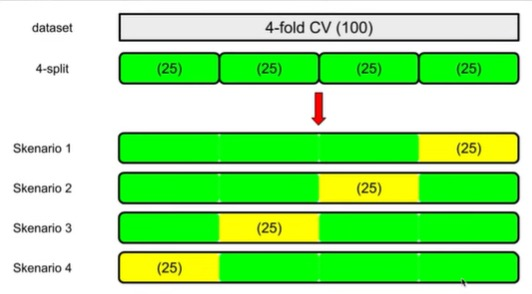

In [154]:
from sklearn.model_selection import cross_val_score

### XGBoost + CV

In [155]:
train_scores=cross_val_score(xgb, X_train, y_train, scoring ='accuracy', cv=5)
# Melatih model pada seluruh data pelatihan
xgb.fit(X_train, y_train)

train_scores.mean()

0.8167634252539913

In [156]:
# Melakukan prediksi pada data testing
ypred_xgb = xgb.predict(X_test)

# Menghitung akurasi pada data testing
test_accuracy = accuracy_score(y_test, ypred_xgb)
test_accuracy

0.7878787878787878

Terlihat bahwa, model tidak lagi overfitting. Karena accuracy trainingnya cenderung tidak beda jauh dengan testingnya.

### Pakai loop

In [157]:
# Inisialisasi model untuk setiap algoritma
xgb = XGBClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()
nn = MLPClassifier()
dt = DecisionTreeClassifier()
svm = SVC()

algorithms = [xgb, rf, knn, lr, nn, dt, svm]
algorithm_names = ['XGBoost', 'Random Forest', 'KNN', 'Logistic Regression', 'Neural Network', 'Decision Tree', 'SVM']

In [158]:
from sklearn.metrics import confusion_matrix

# Loop melalui setiap algoritma
for model, name in zip(algorithms, algorithm_names):
    # Lakukan cross-validation pada data pelatihan
    train_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_train_accuracy = train_scores.mean()

    # Melakukan prediksi pada data pengujian
    ypred = model.fit(X_train, y_train).predict(X_test)

    # Menghitung akurasi
    accuracy = accuracy_score(y_test, ypred)

    print(f'Confusion Matrix for {name}:\n{confusion_matrix(y_test, ypred)}')
    print(f'Accuracy for {name} (Training CV): {mean_train_accuracy:.2f}')
    print(f'Accuracy for {name} (Testing): {accuracy:.2f}')

Confusion Matrix for XGBoost:
[[30 12]
 [ 2 22]]
Accuracy for XGBoost (Training CV): 0.82
Accuracy for XGBoost (Testing): 0.79
Confusion Matrix for Random Forest:
[[30 12]
 [ 3 21]]
Accuracy for Random Forest (Training CV): 0.86
Accuracy for Random Forest (Testing): 0.77
Confusion Matrix for KNN:
[[30 12]
 [ 3 21]]
Accuracy for KNN (Training CV): 0.85
Accuracy for KNN (Testing): 0.77
Confusion Matrix for Logistic Regression:
[[29 13]
 [ 2 22]]
Accuracy for Logistic Regression (Training CV): 0.87
Accuracy for Logistic Regression (Testing): 0.77


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Confusion Matrix for Neural Network:
[[29 13]
 [ 2 22]]
Accuracy for Neural Network (Training CV): 0.88
Accuracy for Neural Network (Testing): 0.77
Confusion Matrix for Decision Tree:
[[26 16]
 [ 5 19]]
Accuracy for Decision Tree (Training CV): 0.77
Accuracy for Decision Tree (Testing): 0.68
Confusion Matrix for SVM:
[[31 11]
 [ 1 23]]
Accuracy for SVM (Training CV): 0.86
Accuracy for SVM (Testing): 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Setelah dilakukan cross-validation (CV) dengan 5 fold, algoritma SVM ternyata memberikan performa testing terbaik dibandingkan dengan algoritma-algoritma lainnya. Hasil cross-validation menunjukkan bahwa performa training dari semua algoritma yang diterapkan tidak setinggi sebelum dilakukan CV. Meskipun begitu, berdasarkan pembagian data training dan testing yang telah dilakukan, akurasi performa testing terbesar diperoleh dari SVM, yakni sebesar 82%. Hal ini menunjukkan bahwa SVM memiliki kemampuan yang lebih baik dalam menggeneralisasi data ke dalam data baru.

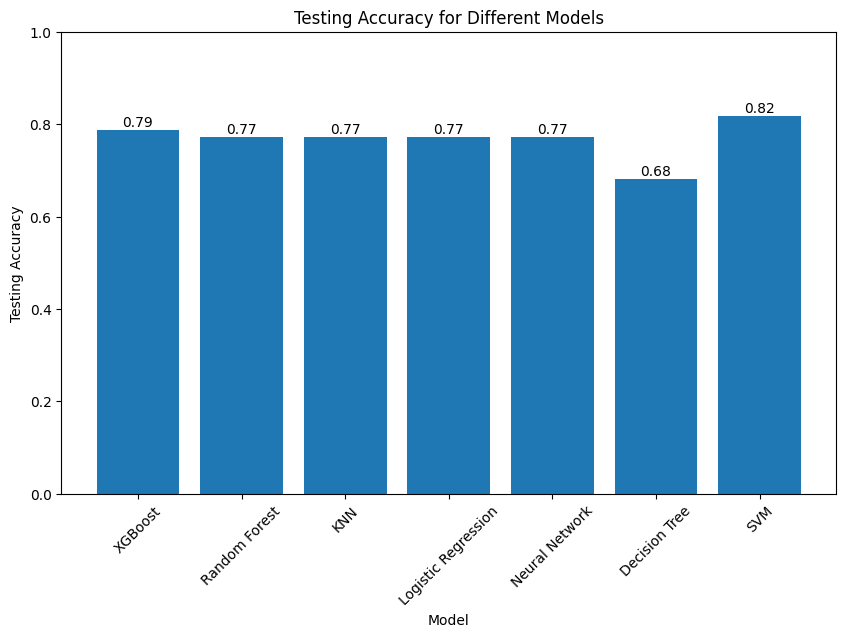

In [159]:
import matplotlib.pyplot as plt

# List akurasi testing dari masing-masing model
test_accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in algorithms]

# Nama-nama model
model_names = algorithm_names

# Plot grafik bar
plt.figure(figsize=(10, 6))
plt.bar(model_names, test_accuracies)
plt.xlabel('Model')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy for Different Models')
plt.ylim([0, 1])  # Mengatur batas akurasi pada sumbu y antara 0 dan 1
plt.xticks(rotation=45)  # Mengatur label model agar tidak bertumpuk

# Menambahkan label angka di atas setiap bar
for i, accuracy in enumerate(test_accuracies):
    plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()


Pada pemodelan pertama, SVM, XGBoost dan Neural Network mampu mengeenraliasikan data dengan baik. Yang mana ditunjukkan pada pengujian data baru, keduanya mampu memberi akurasi terbaik. Yaitu masing masing 82% dan 79%.

Akurasi yang diperoleh mungkin bisa lebih ditingkatkan, maka dilakukan analisis lebih lanjut.

# EDA

In [160]:
import matplotlib.pyplot as plt #data viz
import seaborn as sns #data viz

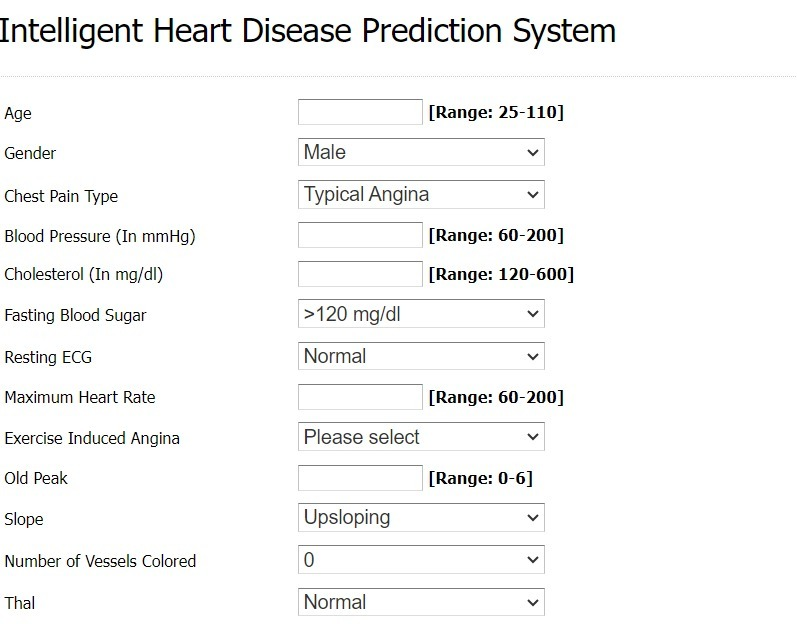

Model Development pertama, tidak dilakukan penghapusan outlier karena alasan nilai-nilai test seperti pada gambar diatas mungkin saja terjadi pada seseorang. Dan ini juga mengindikasikan adanya penyakit. Namun pada implementasinya, baru mendapatkan akurasi terbesar yaitu 82% pada algoritma SVM. Maka akan dicoba melakukan penghapusan outlier untuk mengecek apakah akan membuat performa model membaik atau tidak.

## Cek Outlier age

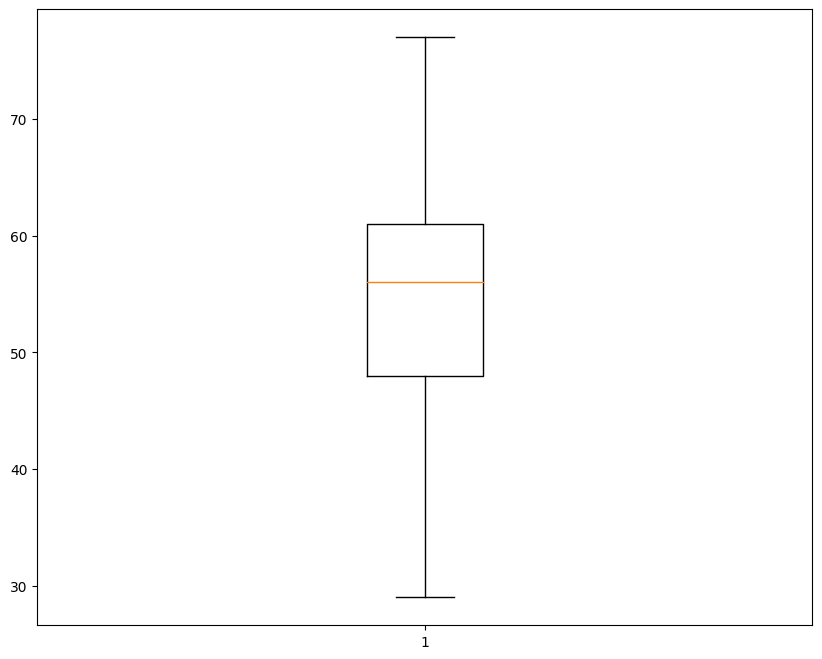

In [161]:
#box-plot
fig = plt.figure(figsize =(10, 8))
plt.boxplot(df2['age'])
plt.show()

In [162]:
#Find Q1 & Q3
q1 = np.percentile(df2.age, 25) #np.quantile(df.Y, 0.25)
q3 = np.percentile(df2.age, 75)

In [163]:
# Find the IQR which is the difference between third and first quartile
iqr = q3 - q1

In [164]:
# Find lower and upper bound
lower_bond = q1 - (1.5*iqr)
upper_bond = q3 + (1.5*iqr)

In [165]:
# Find outliers (cari nilai < lower bond | nilai > upper_bond)
df2[(df2['age'] < lower_bond) | (df2['age'] > upper_bond)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Tidak ada outlier di fitur age

## Cek Outlier trestbps

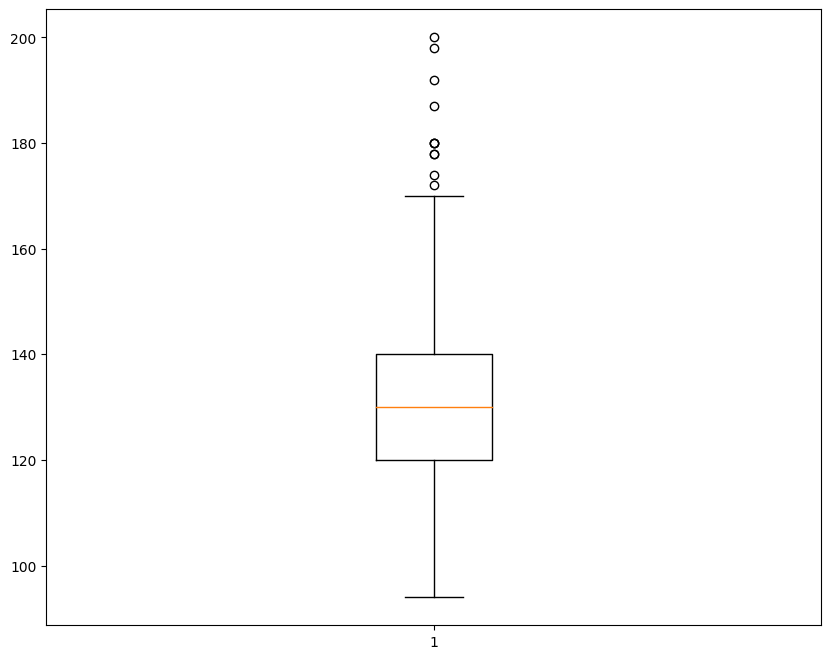

In [166]:
#box-plot
fig = plt.figure(figsize =(10, 8))
plt.boxplot(df2['trestbps'])
plt.show()

In [167]:
#Find Q1 & Q3
q1 = np.percentile(df2.trestbps, 25) #np.quantile(df.Y, 0.25)
q3 = np.percentile(df2.trestbps, 75)

In [168]:
# Find the IQR which is the difference between third and first quartile
iqr_trestbps = q3 - q1

In [169]:
# Find lower and upper bound
lower_bond = q1 - (1.5*iqr_trestbps)
upper_bond = q3 + (1.5*iqr_trestbps)

In [170]:
# Find outliers (cari nilai < lower bond | nilai > upper_bond)
df2[(df2['trestbps'] < lower_bond) | (df2['trestbps'] > upper_bond)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,55,0,0,180,327,0,2,117,1,3.400000,1,0,2,0
44,66,0,0,178,228,1,1,165,1,1.000000,1,2,3,0
76,59,0,0,174,249,0,1,143,1,0.000000,1,0,2,0
112,64,0,0,180,325,0,1,154,1,0.000000,2,0,2,1
124,54,1,1,192,283,0,0,195,0,0.000000,2,1,3,0
142,56,0,0,200,288,1,0,133,1,4.000000,0,2,3,0
226,52,1,2,172,199,1,1,162,0,0.500000,2,0,3,1
248,68,1,2,180,274,1,0,150,1,1.600000,1,0,3,0
271,59,1,3,178,270,0,0,145,0,4.200000,0,0,3,1
312,54,1,1,187,283,0,0,187,0,0.039935,1,0,3,0


In [171]:
# Temukan outlier
outliers = df2[(df2['trestbps'] < lower_bond) | (df2['trestbps'] > upper_bond)]

# Hapus baris yang mengandung outlier dari df2
df3 = df2[~((df2['trestbps'] < lower_bond) | (df2['trestbps'] > upper_bond))]

In [172]:
df3.shape

(317, 14)

In [173]:
df3['target']

0      0
1      0
2      0
3      0
4      0
      ..
323    0
324    0
325    0
326    0
327    0
Name: target, Length: 317, dtype: int64

In [174]:
len(df3['target'])

317

## Cek Outlier chol

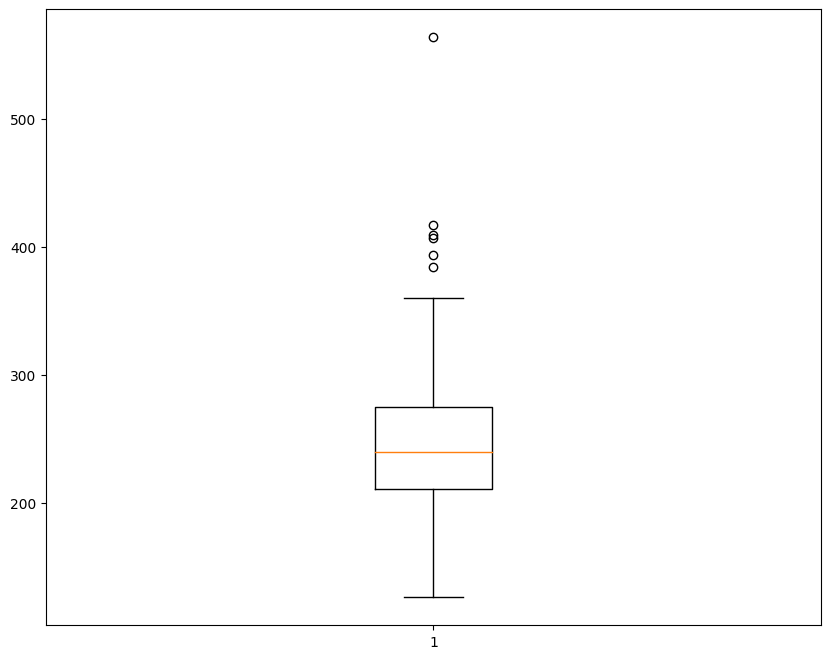

In [175]:
#box-plot
fig = plt.figure(figsize =(10, 8))
plt.boxplot(df3['chol'])
plt.show()

In [176]:
#Find Q1 & Q3
q1 = np.percentile(df3.chol, 25) #np.quantile(df.Y, 0.25)
q3 = np.percentile(df3.chol, 75)

In [177]:
# Find the IQR which is the difference between third and first quartile
iqr_chol = q3 - q1

In [178]:
# Find lower and upper bound
lower_bond = q1 - (1.5*iqr_chol)
upper_bond = q3 + (1.5*iqr_chol)

In [179]:
# Find outliers (cari nilai < lower bond | nilai > upper_bond)
df3[(df3['chol'] < lower_bond) | (df3['chol'] > upper_bond)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
104,65,0,2,140,417,1,0,157,0,0.800000,2,1,2,1
128,67,0,2,115,564,0,0,160,0,1.600000,1,0,3,1
144,56,0,0,134,409,0,0,150,1,1.900000,1,2,3,0
183,62,0,0,140,394,0,0,157,0,1.200000,1,0,2,1
260,63,0,0,150,407,0,0,154,0,4.000000,1,3,3,0
308,62,0,0,144,384,0,0,158,0,2.831421,1,2,2,0


In [180]:
# Membuat DataFrame baru hanya dengan data yang bukan outlier
df4 = df3[(df3['chol'] >= lower_bond) & (df3['chol'] <= upper_bond)]

In [181]:
len(df4['target'])

311

## Cek Outlier thalach

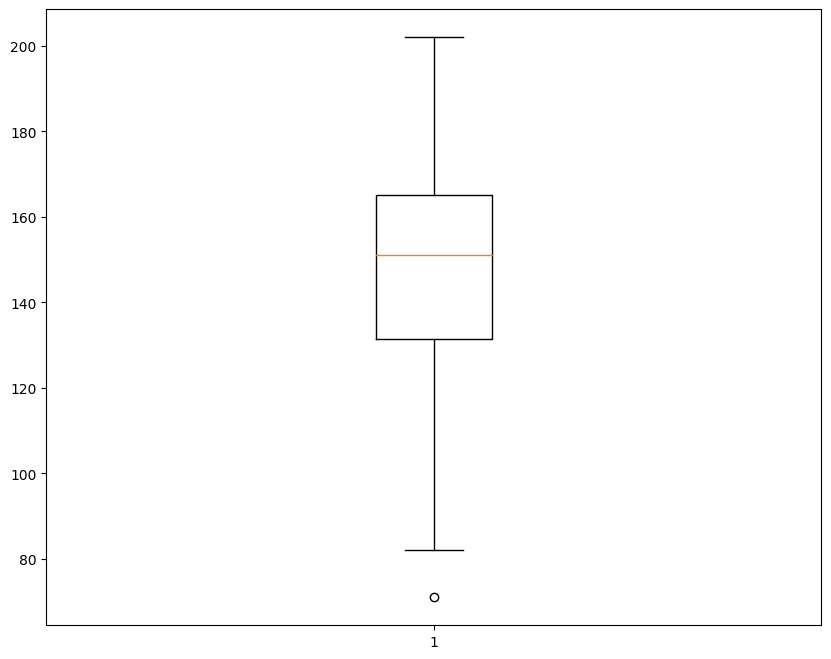

In [182]:
#box-plot
fig = plt.figure(figsize =(10, 8))
plt.boxplot(df4['thalach'])
plt.show()

In [183]:
#Find Q1 & Q3
q1 = np.percentile(df4.thalach, 25) #np.quantile(df.Y, 0.25)
q3 = np.percentile(df4.thalach, 75)

In [184]:
# Find the IQR which is the difference between third and first quartile
iqr_thalach = q3 - q1

In [185]:
# Find lower and upper bound
lower_bond = q1 - (1.5*iqr_thalach)
upper_bond = q3 + (1.5*iqr_thalach)

In [186]:
# Find outliers (cari nilai < lower bond | nilai > upper_bond)
df4[(df4['thalach'] < lower_bond) | (df4['thalach'] > upper_bond)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
188,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [187]:
#drop outlier
df5 = df4[~((df4['thalach'] < lower_bond) | (df4['thalach'] > upper_bond))]

In [188]:
# check kolom x baris setelah outlier di drop
df5.shape

(310, 14)

## Cek Outlier oldpeak

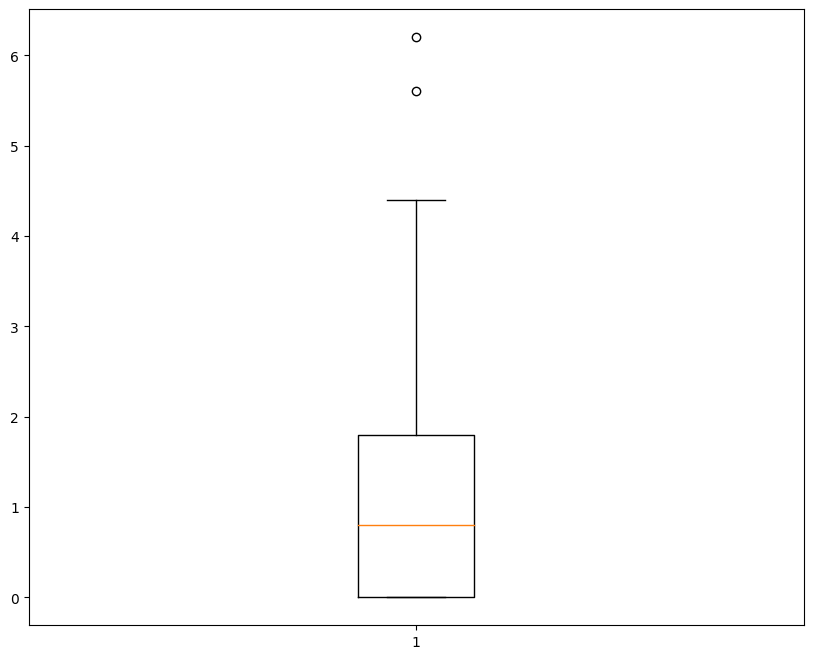

In [189]:
#box-plot
fig = plt.figure(figsize =(10, 8))
plt.boxplot(df5['oldpeak'])
plt.show()

In [190]:
#Find Q1 & Q3
q1 = np.percentile(df5.oldpeak, 25) #np.quantile(df.Y, 0.25)
q3 = np.percentile(df5.oldpeak, 75)

In [191]:
# Find the IQR which is the difference between third and first quartile
iqr_oldpeak = q3 - q1

In [192]:
# Find lower and upper bound
lower_bond = q1 - (1.5*iqr_oldpeak)
upper_bond = q3 + (1.5*iqr_oldpeak)

In [193]:
# Find outliers (cari nilai < lower bond | nilai > upper_bond)
df5[(df5['oldpeak'] < lower_bond) | (df5['oldpeak'] > upper_bond)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
51,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
63,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0


In [194]:
#drop outlier
df6 = df5[~((df5['oldpeak'] < lower_bond) | (df5['oldpeak'] > upper_bond))]

In [195]:
# check kolom x baris setelah outlier di drop
df6.shape

(308, 14)

<ipython-input-196-2433dd5087f6>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'cp'),
  Text(0, 3.5, 'trestbps'),
  Text(0, 4.5, 'chol'),
  Text(0, 5.5, 'fbs'),
  Text(0, 6.5, 'restecg'),
  Text(0, 7.5, 'thalach'),
  Text(0, 8.5, 'exang'),
  Text(0, 9.5, 'oldpeak'),
  Text(0, 10.5, 'slope'),
  Text(0, 11.5, 'ca'),
  Text(0, 12.5, 'thal'),
  Text(0, 13.5, 'target')])

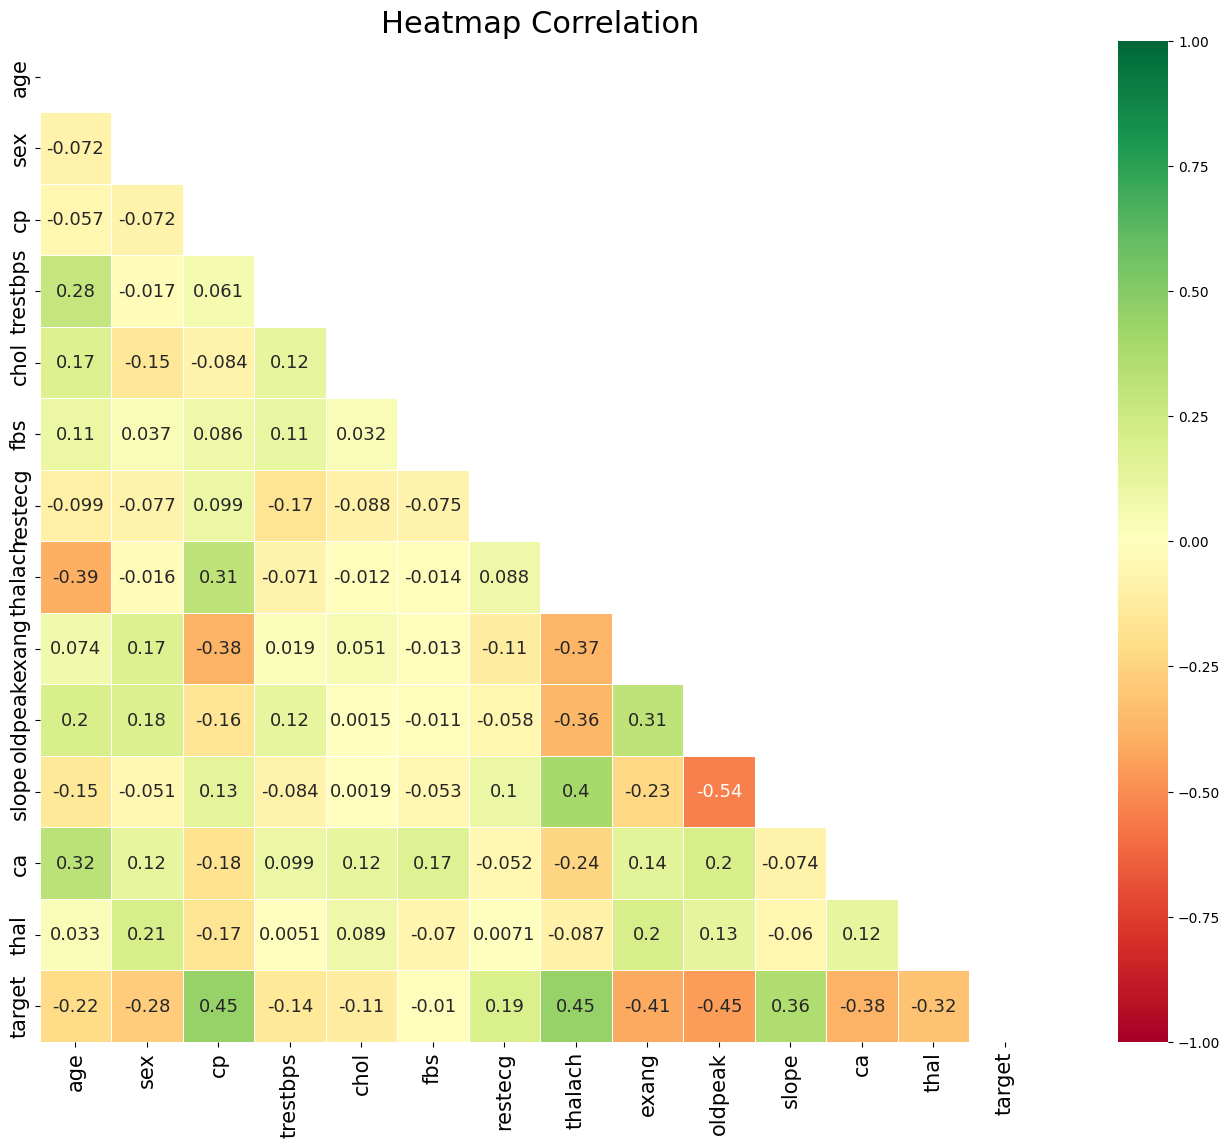

In [196]:
#Heatmap Correlation
import seaborn as sns

corr = df6.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.7, annot_kws={"size": 13})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

Berdasrkan correlation test, dapat diketahui bahwa ada hubungan positif antara cp (0.45), restecg (0.19), thalach (0.45), slope (0.36).

Korelasi yang paling kuat:
- positif dengan target cp, thalach, slope
- negatif dengan target exang, oldpeak, ca, thal




##Visualisasi Data

In [197]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 327
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       308 non-null    int64  
 1   sex       308 non-null    int64  
 2   cp        308 non-null    int64  
 3   trestbps  308 non-null    int64  
 4   chol      308 non-null    int64  
 5   fbs       308 non-null    int64  
 6   restecg   308 non-null    int64  
 7   thalach   308 non-null    int64  
 8   exang     308 non-null    int64  
 9   oldpeak   308 non-null    float64
 10  slope     308 non-null    int64  
 11  ca        308 non-null    int64  
 12  thal      308 non-null    int64  
 13  target    308 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 36.1 KB


<Axes: xlabel='age', ylabel='Count'>

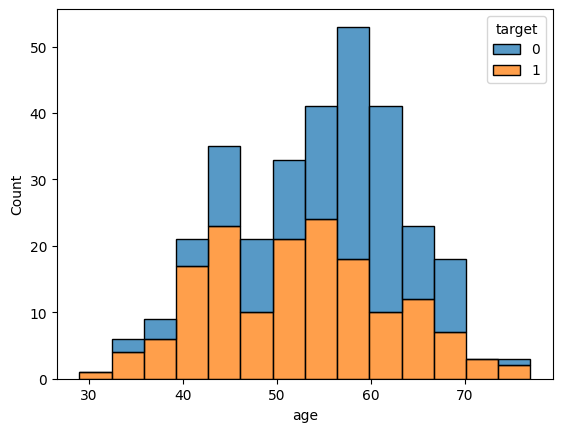

In [198]:
sns.histplot(data=df6, x='age', hue='target', multiple='stack')

<Axes: xlabel='sex', ylabel='Count'>

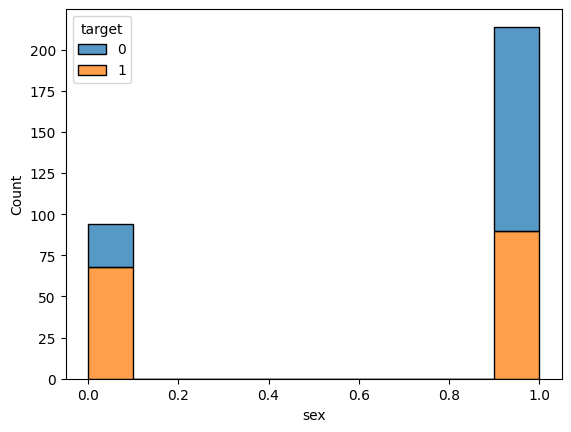

In [199]:
sns.histplot(data=df6, x='sex', hue='target', multiple='stack')

<Axes: xlabel='cp', ylabel='Count'>

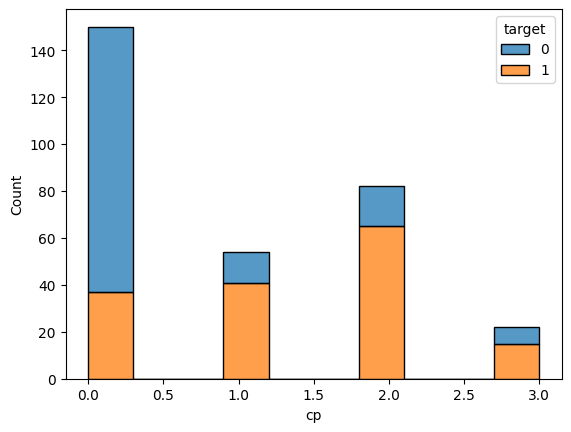

In [200]:
sns.histplot(data=df6, x='cp', hue='target', multiple='stack')

<Axes: xlabel='trestbps', ylabel='Count'>

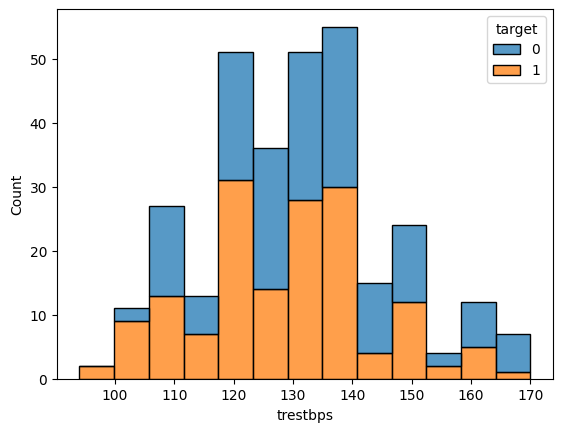

In [201]:
sns.histplot(data=df6, x='trestbps', hue='target', multiple='stack')

<Axes: xlabel='chol', ylabel='Count'>

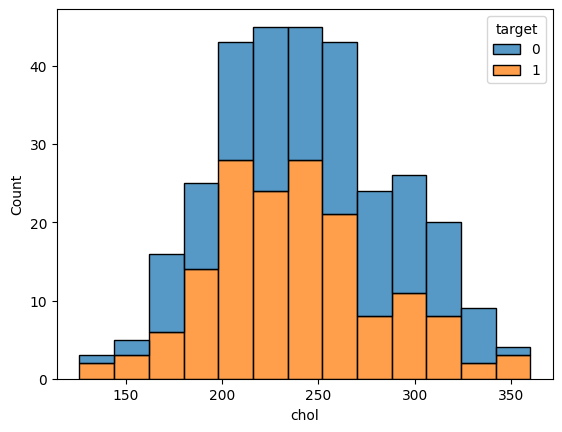

In [202]:
sns.histplot(data=df6, x='chol', hue='target', multiple='stack')

<Axes: xlabel='fbs', ylabel='Count'>

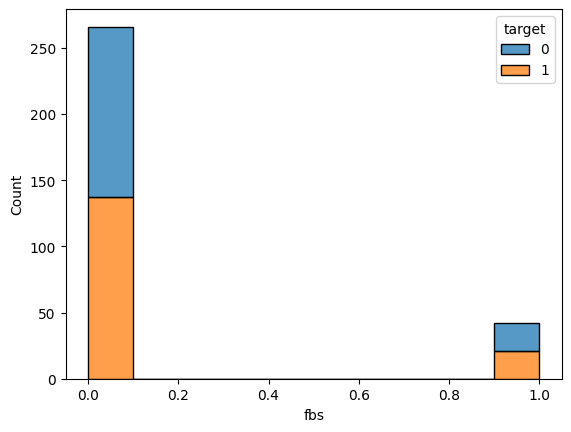

In [203]:
sns.histplot(data=df6, x='fbs', hue='target', multiple='stack')

<Axes: xlabel='restecg', ylabel='Count'>

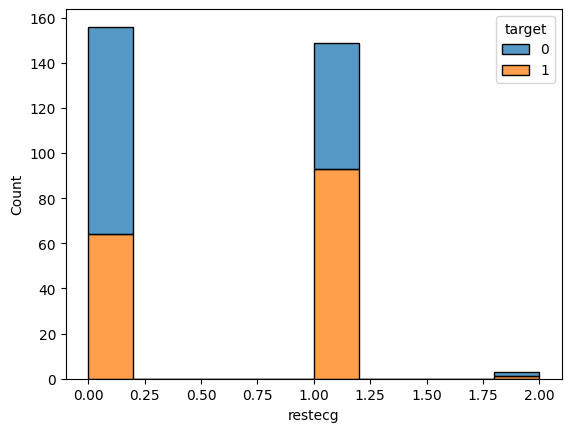

In [204]:
sns.histplot(data=df6, x='restecg', hue='target', multiple='stack')

<Axes: xlabel='thalach', ylabel='Count'>

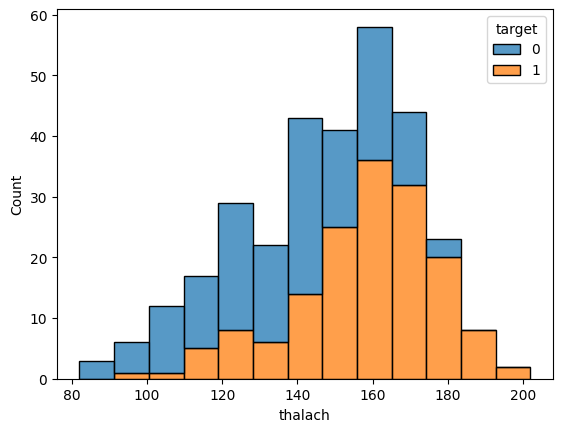

In [205]:
sns.histplot(data=df6, x='thalach', hue='target', multiple='stack')

<Axes: xlabel='exang', ylabel='Count'>

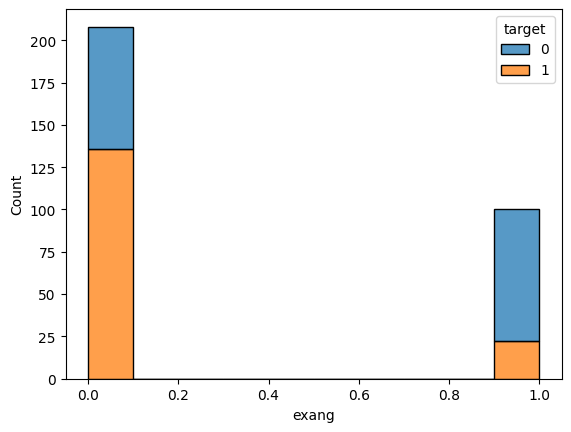

In [206]:
sns.histplot(data=df6, x='exang', hue='target', multiple='stack')

<Axes: xlabel='oldpeak', ylabel='Count'>

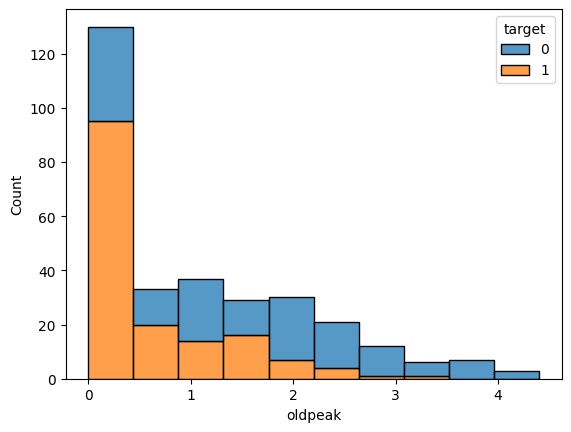

In [207]:
sns.histplot(data=df6, x='oldpeak', hue='target', multiple='stack')

<Axes: xlabel='slope', ylabel='Count'>

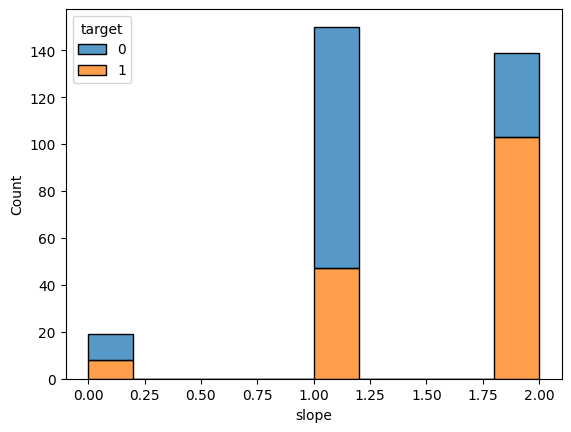

In [208]:
sns.histplot(data=df6, x='slope', hue='target', multiple='stack')

<Axes: xlabel='ca', ylabel='Count'>

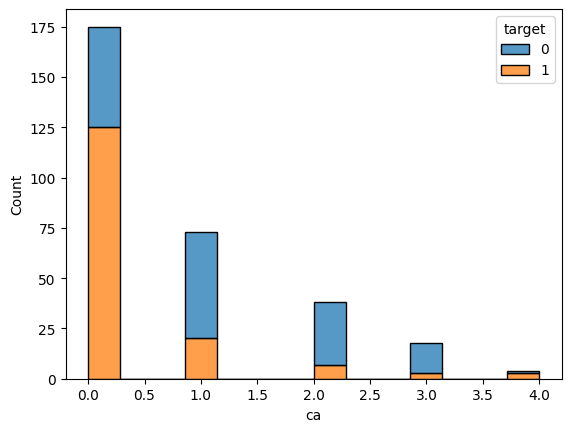

In [209]:
sns.histplot(data=df6, x='ca', hue='target', multiple='stack')

<Axes: xlabel='thal', ylabel='Count'>

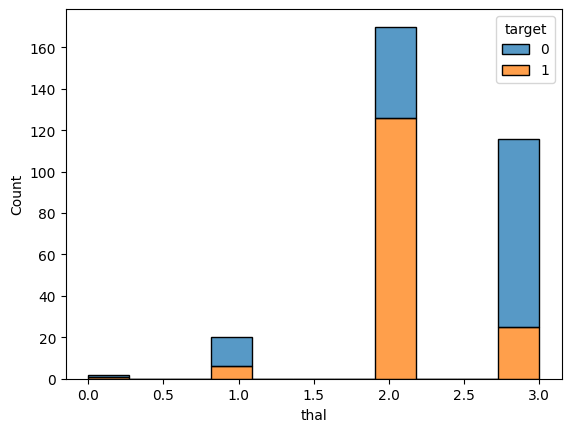

In [210]:
sns.histplot(data=df6, x='thal', hue='target', multiple='stack')

Dicobakan model development kedua, dengan tujuan bahwa dengan menggunakan data yang tidak mengandung outlier, mampu membuat model yang dibangun lebih berperforma optimal.

# Model Development 2

In [211]:
# Bagi data menjadi fitur (X) dan label (y)
X_2 = df6.drop('target', axis=1)
y_2 = df6['target']

In [212]:
# Melihat jumlah data di X_2
num_samples_X_2, num_features_X_2 = X_2.shape
print(f"Jumlah sampel di X_2: {num_samples_X_2}")

# Melihat jumlah data di y_2
num_samples_y_2 = y_2.shape[0]  # Karena y_2 adalah Series, kita hanya perlu menghitung jumlah barisnya
print(f"Jumlah sampel di y_2: {num_samples_y_2}")


Jumlah sampel di X_2: 308
Jumlah sampel di y_2: 308


Model Development kedua menggunakan data yang lebih sedikit yaitu 308 saja.

In [213]:
from sklearn.preprocessing import StandardScaler
# Normalisasi data
scaler = StandardScaler()
X_2 = scaler.fit_transform(X_2)

In [214]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [215]:
print(len(X_train))

246


In [216]:
print(len(X_test))

62


Diujikan model yang sebelumnya berperfoma baik yaitu SVM. Untuk memeriksa, apakah dengan data yang lebih minim karena penghapusan outlier, model tersebut mampu memberi performa yang baik juga atau bisa lebih baik.

### SVM + CV + Data Bebas Outlier

In [217]:
svm2 = SVC()

In [218]:
from sklearn.model_selection import cross_val_score

train_scores=cross_val_score(svm2, X_train, y_train, scoring ='accuracy', cv=5)
# Melatih model pada seluruh data pelatihan
svm2.fit(X_train, y_train)

train_scores.mean()

0.8533061224489795

In [219]:
# Melakukan prediksi pada data testing
ypred_svm2 = svm2.predict(X_test)

# Menghitung akurasi pada data testing
test_accuracy = accuracy_score(y_test, ypred_svm2)
test_accuracy

0.8225806451612904

Dengan data yang lebih minim, ternyata SVM masih memberi performa yang bagus. Maka langkah penghapusan outlier menjadi pilihan yang mungkin tepat pada case ini.

### Beberapa Model + CV + Data Bebas Outlier

In [220]:
# Inisialisasi model untuk setiap algoritma
xgb2 = XGBClassifier()
rf2 = RandomForestClassifier()
knn2 = KNeighborsClassifier()
lr2 = LogisticRegression()
nn2 = MLPClassifier()
dt2 = DecisionTreeClassifier()
svm2 = SVC()

In [221]:
algorithms = [xgb2, rf2, knn2, lr2, nn2, dt2, svm2]
algorithm_names = ['XGBoost2', 'Random Forest2', 'KNN2', 'Logistic Regression2', 'Neural Network2', 'Decision Tree2', 'SVM2']
accuracies = []

In [222]:
from sklearn.model_selection import cross_val_score

# Loop melalui setiap algoritma
for model, name in zip(algorithms, algorithm_names):
    # Lakukan cross-validation pada data pelatihan
    train_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_train_accuracy = train_scores.mean()

    # Melatih model pada data pelatihan
    model.fit(X_train, y_train)

    # Melakukan prediksi pada data pengujian
    ypred = model.predict(X_test)

    # Menghitung akurasi pada data pengujian
    test_accuracy = accuracy_score(y_test, ypred)

    # Tampilkan hasil performa
    print(f'Accuracy for {name} (Training CV): {mean_train_accuracy:.2f}')
    print(f'Accuracy for {name} (Testing): {test_accuracy:.2f}')


Accuracy for XGBoost2 (Training CV): 0.79
Accuracy for XGBoost2 (Testing): 0.81
Accuracy for Random Forest2 (Training CV): 0.83
Accuracy for Random Forest2 (Testing): 0.81
Accuracy for KNN2 (Training CV): 0.83
Accuracy for KNN2 (Testing): 0.79
Accuracy for Logistic Regression2 (Training CV): 0.86
Accuracy for Logistic Regression2 (Testing): 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Accuracy for Neural Network2 (Training CV): 0.85
Accuracy for Neural Network2 (Testing): 0.77
Accuracy for Decision Tree2 (Training CV): 0.70
Accuracy for Decision Tree2 (Testing): 0.82
Accuracy for SVM2 (Training CV): 0.85
Accuracy for SVM2 (Testing): 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


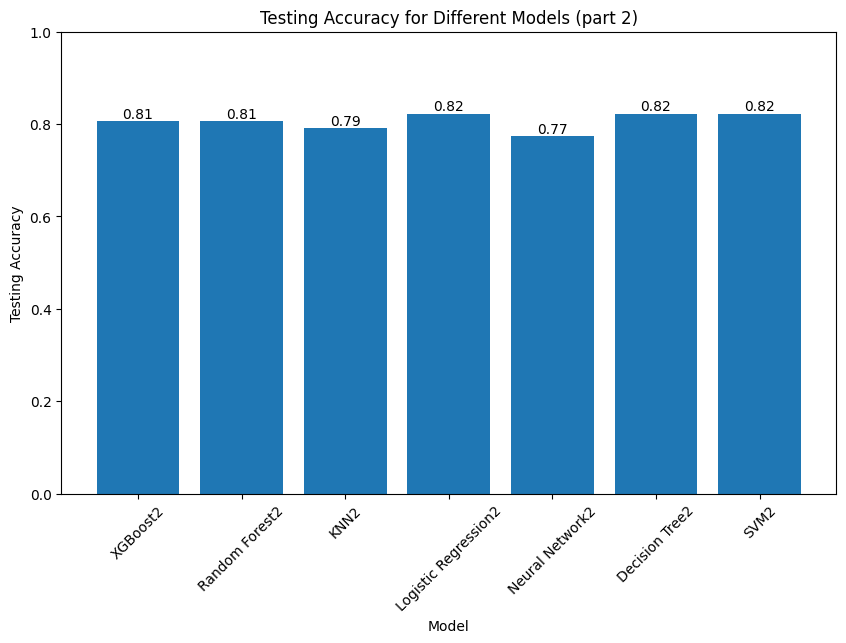

In [223]:
import matplotlib.pyplot as plt

# List akurasi testing dari masing-masing model
test_accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in algorithms]

# Nama-nama model
model_names = algorithm_names

# Plot grafik bar
plt.figure(figsize=(10, 6))
plt.bar(model_names, test_accuracies)
plt.xlabel('Model')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy for Different Models (part 2)')
plt.ylim([0, 1])  # Mengatur batas akurasi pada sumbu y antara 0 dan 1
plt.xticks(rotation=45)  # Mengatur label model agar tidak bertumpuk

# Menambahkan label angka di atas setiap bar
for i, accuracy in enumerate(test_accuracies):
    plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()


Dengan model yang dikembangkan, ternyata algoritma SVM dan Logistic Regression juga bisa dikatakan baik. Dimana mengungguli model lainnya, yang mana algoritma ini memperoleh akurasi terbesar yaitu 82%.

Percobaan selanjutnya dilakukan dengan menyeleksi fitur yang ada di dataset. Untuk mencoba, apakah dengan mengimplementasikan fitur-fitur yang paling berpengaruh saja pada model, mampu membuat model berperforma baik atau tidak.

# Seleksi Fitur

In [224]:
from sklearn.ensemble import RandomForestClassifier

# Buat model Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_2, y_2)

RandomForestClassifier(random_state=42)

In [225]:
print(len(X_2))

308


In [226]:
# Mendapatkan feature importance dari model Random Forest
feature_importances = rfc.feature_importances_

# Menggabungkan nama fitur dan feature importance
feature_importance_dict = dict(zip(df6.columns, feature_importances))

In [227]:
# Menyortir fitur berdasarkan feature importance (dari yang paling besar)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Tampilkan hasil seleksi fitur
for feature, importance in sorted_feature_importance:
    print(f'Fitur: {feature}, Feature Importance: {importance:.4f}')

Fitur: cp, Feature Importance: 0.1514
Fitur: thalach, Feature Importance: 0.1376
Fitur: oldpeak, Feature Importance: 0.1262
Fitur: ca, Feature Importance: 0.1018
Fitur: age, Feature Importance: 0.0924
Fitur: thal, Feature Importance: 0.0913
Fitur: chol, Feature Importance: 0.0749
Fitur: trestbps, Feature Importance: 0.0733
Fitur: slope, Feature Importance: 0.0560
Fitur: exang, Feature Importance: 0.0329
Fitur: sex, Feature Importance: 0.0302
Fitur: restecg, Feature Importance: 0.0211
Fitur: fbs, Feature Importance: 0.0107


Dari hasil seleksi fitur menggunakan random forest regsessor. Terdapat 6 fitur yang paling berkolerasi dengan target. Yaitu fitur cp (0.1514), fitur thalach (0.1376), fitur oldpeak (0.1262), fitur ca (0.1018), fitur age (0.0924) dan fitur thal (0.0913)

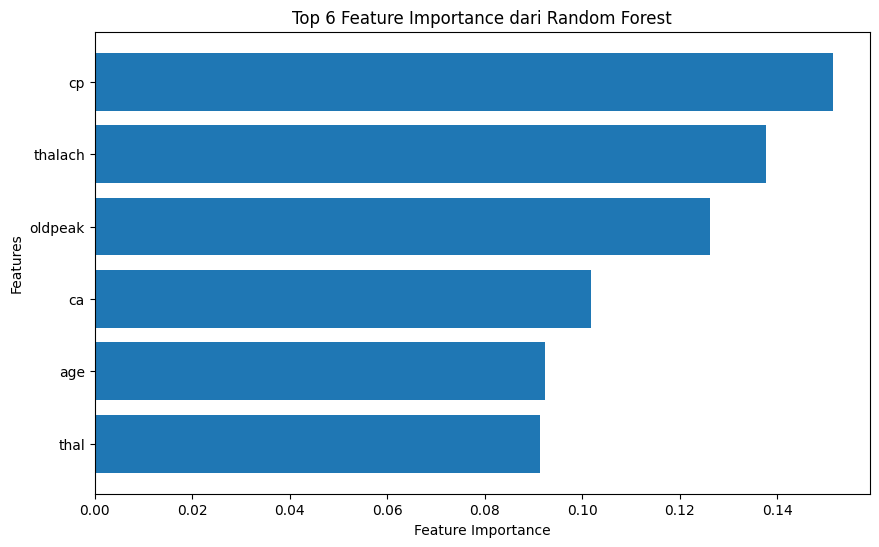

In [228]:
# Mengambil indeks 6 fitur teratas berdasarkan importance
top_feature_indices = np.argsort(feature_importances)[::-1][:6]
top_features = [df6.columns[i] for i in top_feature_indices]
top_importances = feature_importances[top_feature_indices]

# Membuat grafik batang untuk feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 6 Feature Importance dari Random Forest')

plt.gca().invert_yaxis()

plt.show()

Dipilih 6 fitur yang berbobot paling tinggi, karena di fitur keenam menunjukkan perbedaan yang signifikan dengan fitur lain.

# Model Development 3

Model dengan data yang telah dihapus outliernya + CV + dengan 6 Fitur yang dipilih

In [229]:
# Mengambil indeks 6 fitur teratas berdasarkan importance
top_feature_indices = np.argsort(feature_importances)[::-1][:6]
top_features = [df6.columns[i] for i in top_feature_indices]

# Mencetak fitur teratas
print("Top 6 Features based on Importance:")
for feature in top_features:
    print(feature)

Top 6 Features based on Importance:
cp
thalach
oldpeak
ca
age
thal


In [230]:
# Mengambil hanya fitur-fitur terpilih
X_selected = X_2[:, top_feature_indices]

In [231]:
X_selected

array([[-0.90727879,  0.84713999, -0.02357834,  1.3164256 , -0.24000783,
         1.14019498],
       [-0.90727879,  0.28537309,  1.94601994, -0.72618943, -0.12817362,
         1.14019498],
       [-0.90727879, -1.01101205,  1.47706797, -0.72618943,  1.77300793,
         1.14019498],
       ...,
       [-0.90727879,  0.24216026,  0.68980075,  0.29511808,  0.65466584,
         1.14019498],
       [ 0.07667145, -0.66530935,  1.12479842,  0.29511808,  0.54283163,
        -2.11147218],
       [ 0.07667145,  0.15573458, -0.49524447, -0.72618943,  0.31916321,
         1.14019498]])

## FS+XGBoost

In [232]:
X_3 = X_selected
y_3 = y_2

In [233]:
from sklearn.preprocessing import StandardScaler
# Normalisasi data
scaler = StandardScaler()
X_3 = scaler.fit_transform(X_3)

In [234]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

In [235]:
X_train.shape

(246, 6)

In [236]:
X_test.shape

(62, 6)

Model Development 3 hanya menggunakan 308 data dengan 6 fitur terbaik

Dicoba menggunakan algoritma SVM

In [237]:
# Inisialisasi model SVM
svm = SVC()

# Menghitung akurasi dengan cross-validation
train_scores = cross_val_score(svm, X_train, y_train, scoring='accuracy', cv=5)
mean_train_accuracy = train_scores.mean()

# Melatih model pada seluruh data pelatihan
svm.fit(X_train, y_train)

# Melakukan prediksi pada data testing
ypred_svm = svm.predict(X_test)

# Menghitung akurasi pada data testing
test_accuracy = accuracy_score(y_test, ypred_svm)

print("Training Accuracy (CV): {:.2f}".format(mean_train_accuracy))
print("Testing Accuracy: {:.2f}".format(test_accuracy))

Training Accuracy (CV): 0.81
Testing Accuracy: 0.84


Didapat akurasi yang bagus pada saat pengujian, sebesar 84% mengungguli model dan metode sebelumnya.

## Perbandingan dengan algoritma lain

In [238]:
# Inisialisasi model untuk setiap algoritma
xgb3 = XGBClassifier()
rf3 = RandomForestClassifier()
knn3 = KNeighborsClassifier()
lr3 = LogisticRegression()
nn3 = MLPClassifier()
dt3 = DecisionTreeClassifier()
svm3 = SVC()

In [239]:
algorithms = [xgb3, rf3, knn3, lr3, nn3, dt3, svm3]
algorithm_names = ['XGBoost3', 'Random Forest3', 'KNN3', 'Logistic Regression3', 'Neural Network3', 'Decision Tree3', 'SVM3']
accuracies = []

In [240]:
# Inisialisasi list untuk menyimpan akurasi training dan testing
train_accuracies = []
test_accuracies = []

In [241]:
from sklearn.model_selection import cross_val_score

# Loop melalui setiap algoritma
for model, name in zip(algorithms, algorithm_names):
    # Lakukan cross-validation pada data pelatihan
    train_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_train_accuracy = train_scores.mean()

    # Melatih model pada data pelatihan
    model.fit(X_train, y_train)

    # Melakukan prediksi pada data pengujian
    ypred = model.predict(X_test)

    # Menghitung akurasi pada data pengujian
    test_accuracy = accuracy_score(y_test, ypred)

    # Simpan akurasi training dan testing ke dalam list
    train_accuracies.append(mean_train_accuracy)
    test_accuracies.append(test_accuracy)

    # Tampilkan hasil performa
    print(f'Accuracy for {name} (Training CV): {mean_train_accuracy:.2f}')
    print(f'Accuracy for {name} (Testing): {test_accuracy:.2f}')

Accuracy for XGBoost3 (Training CV): 0.78
Accuracy for XGBoost3 (Testing): 0.77
Accuracy for Random Forest3 (Training CV): 0.79
Accuracy for Random Forest3 (Testing): 0.82
Accuracy for KNN3 (Training CV): 0.80
Accuracy for KNN3 (Testing): 0.82
Accuracy for Logistic Regression3 (Training CV): 0.83
Accuracy for Logistic Regression3 (Testing): 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Accuracy for Neural Network3 (Training CV): 0.83
Accuracy for Neural Network3 (Testing): 0.82
Accuracy for Decision Tree3 (Training CV): 0.76
Accuracy for Decision Tree3 (Testing): 0.74
Accuracy for SVM3 (Training CV): 0.81
Accuracy for SVM3 (Testing): 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Ternyata dengan menggunakan seleksi fitur, dan menerapkan fitur-fitur yang paling berpengaruh saja pada model. Performa tiap model cukup signifikan naik. Diperoleh akurasi testing terbesar adalah 84% dari algoritma SVM dan Neural Network. Algoritma KNN, Random Forest dan Logistic Regression juga menunjukkan performa yang baik yang mana akurasinya sebesar 82%.

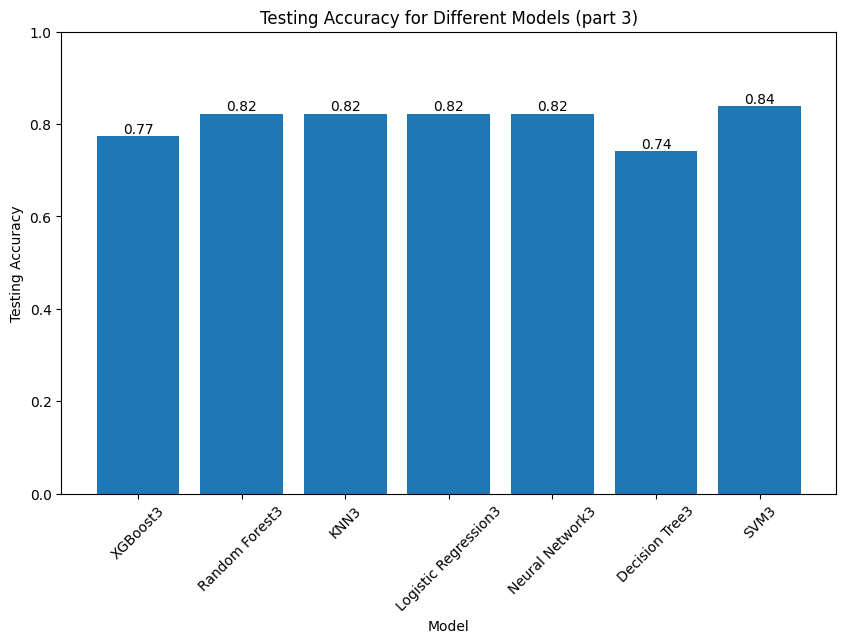

In [242]:
import matplotlib.pyplot as plt

# List akurasi testing dari masing-masing model
test_accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in algorithms]

# Nama-nama model
model_names = algorithm_names

# Plot grafik bar
plt.figure(figsize=(10, 6))
plt.bar(model_names, test_accuracies)
plt.xlabel('Model')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy for Different Models (part 3)')
plt.ylim([0, 1])  # Mengatur batas akurasi pada sumbu y antara 0 dan 1
plt.xticks(rotation=45)  # Mengatur label model agar tidak bertumpuk

# Menambahkan label angka di atas setiap bar
for i, accuracy in enumerate(test_accuracies):
    plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()


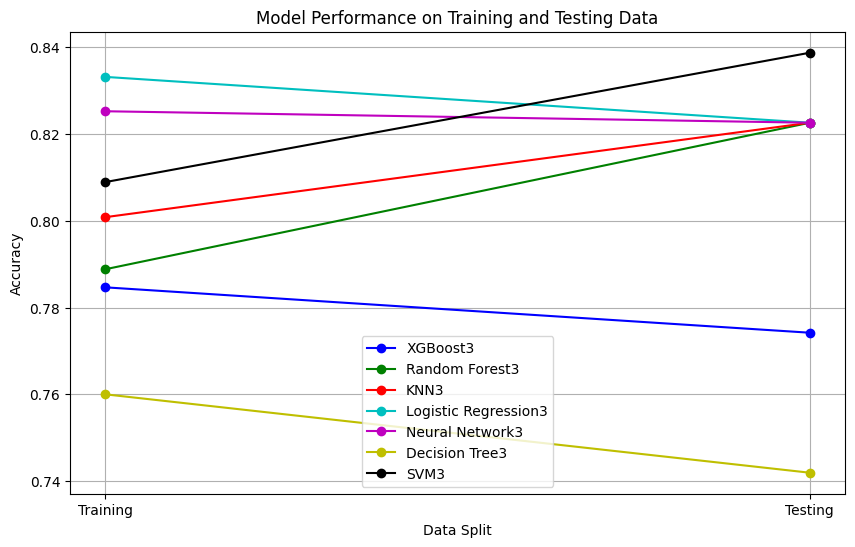

In [243]:
# Warna yang berbeda untuk masing-masing algoritma
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Plot line chart
plt.figure(figsize=(10, 6))
for name, train_accuracy, test_accuracy, color in zip(algorithm_names, train_accuracies, test_accuracies, colors):
    plt.plot(['Training', 'Testing'], [train_accuracy, test_accuracy], label=name, color=color, marker='o')

plt.xlabel('Data Split')
plt.ylabel('Accuracy')
plt.title('Model Performance on Training and Testing Data')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Dibanding dengan algoritma SVM, Neural network lebih baik jika dilihat dari performa training dan testingnya. Yang sama sama cukup tinggi.

## Learning Curve

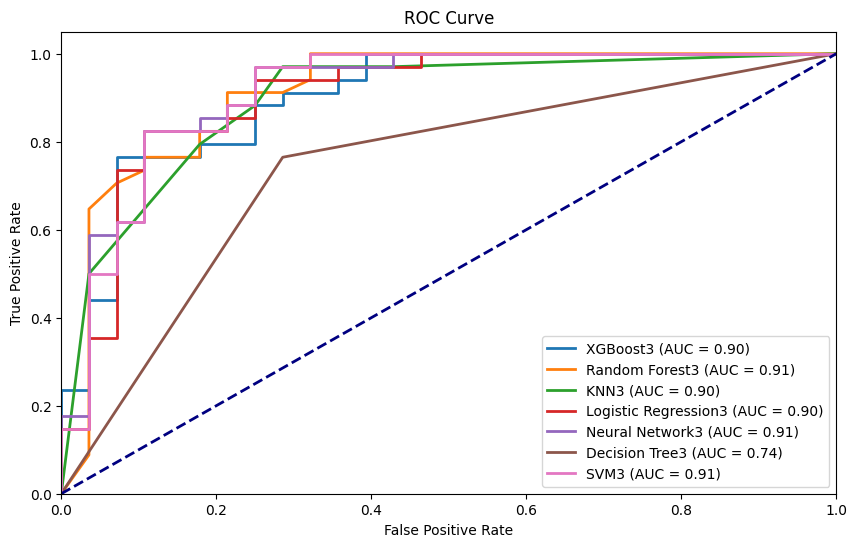

In [244]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

algorithms = [xgb3, rf3, knn3, lr3, nn3, dt3, svm3]
algorithm_names = ['XGBoost3', 'Random Forest3', 'KNN3', 'Logistic Regression3', 'Neural Network3', 'Decision Tree3', 'SVM3']

plt.figure(figsize=(10, 6))

for model, name in zip(algorithms, algorithm_names):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:,1]  # Get predicted probabilities for class 1
    else:
        y_score = model.decision_function(X_test)  # For SVM, use decision function

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Dari Curve ini juga dapat dilihat performa tiap algoritmanya. Nilai AUC yang lebih tinggi menunjukkan model mampu bekerja dengan lebih baik.

Namun apabila kepentinganya tidak berdasarkan accuracy, namun recall dan precision. Mungkin bisa dibuat pertimbangan juga dari performa pengukuran itu dari algoritma-algoritma yang diterapkan

In [245]:
from sklearn.metrics import precision_score, recall_score

algorithms = [xgb3, rf3, knn3, lr3, nn3, dt3, svm3]
algorithm_names = ['XGBoost3', 'Random Forest3', 'KNN3', 'Logistic Regression3', 'Neural Network3', 'Decision Tree3', 'SVM3']

for model, name in zip(algorithms, algorithm_names):
    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f'Algorithm: {name}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')

Algorithm: XGBoost3
Precision: 0.79
Recall: 0.79
Algorithm: Random Forest3
Precision: 0.83
Recall: 0.85
Algorithm: KNN3
Precision: 0.81
Recall: 0.88
Algorithm: Logistic Regression3
Precision: 0.83
Recall: 0.85
Algorithm: Neural Network3
Precision: 0.85
Recall: 0.82
Algorithm: Decision Tree3
Precision: 0.76
Recall: 0.76
Algorithm: SVM3
Precision: 0.83
Recall: 0.88


Jika dilihat berdasarkan precision dan recallnya, mungkin algoritma Random Forest, KNN, Logistic Regression, Neural Network dan SVM merupakan algoritma yang patut dipertimbangkan.

Namun performa terbesar adalah 84%, dilakukan hyperparameter tunning untuk meningkatkan performa algoritma tersebut.

## Hyperparameter Tunning dengan GridSearchCV

In [246]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Inisialisasi model NN
nn = MLPClassifier(random_state=42)

# Daftar hiperparameter yang akan diuji
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (50, 100, 50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [100, 200, 300],
}

In [247]:
# Inisialisasi GridSearchCV
grid_search_nn = GridSearchCV(nn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Melakukan pencarian hiperparameter terbaik
grid_search_nn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50, 50), (100, 100),
                                                (50, 100, 50)],
                         'max_iter': [100, 200, 300]},
             scoring='accuracy')

In [248]:
# Menampilkan parameter terbaik
best_params = grid_search_nn.best_params_
print("Best Parameters for Neural Network:")
print(best_params)

Best Parameters for Neural Network:
{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'max_iter': 100}


In [249]:
# Gunakan model dengan parameter terbaik
best_nn = grid_search_nn.best_estimator_

# Melakukan prediksi pada data pelatihan
ypred_train = best_nn.predict(X_train)

In [250]:
# Menghitung akurasi pada data pelatihan
train_accuracy = accuracy_score(y_train, ypred_train)
print("Training Accuracy: {:.2f}".format(train_accuracy))

# Melakukan prediksi pada data pengujian
ypred_test = best_nn.predict(X_test)

# Menghitung akurasi pada data pengujian
test_accuracy = accuracy_score(y_test, ypred_test)
print("Testing Accuracy: {:.2f}".format(test_accuracy))

Training Accuracy: 0.84
Testing Accuracy: 0.81


Dengan parameter tunning yang dicobakan, ternyata tidak membuat algoritma NN bekerja lebih baik karena kurasinya malah turun.

In [251]:
# Inisialisasi model SVM
svm = SVC()

# Daftar hiperparameter yang akan diuji
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1],
}

In [252]:
# Inisialisasi GridSearchCV
grid_search_svm = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Melakukan pencarian hiperparameter terbaik
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [253]:
# Menampilkan parameter terbaik
best_params = grid_search_svm.best_params_
print("Best Parameters for SVM:")
print(best_params)

Best Parameters for SVM:
{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [254]:
# Gunakan model dengan parameter terbaik
best_svm = grid_search_svm.best_estimator_

# Melakukan prediksi pada data pelatihan
ypred_train = best_svm.predict(X_train)

In [255]:
# Menghitung akurasi pada data pelatihan
train_accuracy = accuracy_score(y_train, ypred_train)
print("Training Accuracy: {:.2f}".format(train_accuracy))

# Melakukan prediksi pada data pengujian
ypred_test = best_svm.predict(X_test)

# Menghitung akurasi pada data pengujian
test_accuracy = accuracy_score(y_test, ypred_test)
print("Testing Accuracy: {:.2f}".format(test_accuracy))

Training Accuracy: 0.85
Testing Accuracy: 0.79


Begitu juga dengan SVM yang juga tidak lebih baik performanya

Jadi bisa dikatakan bahwa hyperparamater tunning menggunakan GridSearchCV tidak bisa meningkatkan akurasi pada case dan dataset ini.

# Kesimpulan

Pada case ini ditunjukkan bahwa model yang menggunakan data yang bebas outlier dan hanya menggunakan fitur-fitur yang paling berpengaruh menunjukkan model lebih optimal dalam memprediksi HD. Dan ini juga menunjukkan juga bahwa, dengan data yang lebih sedikit namun tidak kotor akan membuat model lebih bekerja dengan baik pula. Algoritma SVM dan Neural Network menjadi algoritma yang paling bagus dan mendeteksi HD apabila dibandingkan dengan model lainnya. Namun metode hyperparameter tunning menggunakan GridSearchCV dengan parameter-parameter yang diterapkan, ternyata tidak membuat model lebih bekerja dengan optimal dan tidak lebih berperforma baik.

# Recommendation
Untuk mencapai akurasi yang lebih, mungkin bisa diuji cobakan menggunakan metode lain, seperti penggunaan metode seleksi fiturnya, pemilihan algoritmanya, penggunaan metode hyperparameter tunningnya. Atau mungkin saja membangun modek yang lebih kompleks lagi menggunakan model Stacking Ensemble, Vooting ataupun Bagging.